In [2]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv("heart_cleveland_upload.csv")

In [8]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0          0  
1        0   2     0          0  
2        2   0     0          0  
3        1   1     0          1  
4        1   0     0          0  
..     ...  ..   ...        ...  
292      0   0     2          1  
293      1   0     2          1  
294      1   0     2          1  
295      0   0     0          0  
296      0   0     2          1  

[297 rows x 14 columns]>

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df, df['condition'], test_size=0.2, random_state=42)

In [15]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [16]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = rf_classifier.predict(X_test)

In [18]:
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [22]:
performance=classification_report(y_test,y_pred)

In [23]:
performance

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        32\n           1       1.00      1.00      1.00        28\n\n    accuracy                           1.00        60\n   macro avg       1.00      1.00      1.00        60\nweighted avg       1.00      1.00      1.00        60\n'

In [24]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_test, y_pred)

array([[32,  0],
       [ 0, 28]])

In [27]:
print(performance)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        28

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [28]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[32  0]
 [ 0 28]]


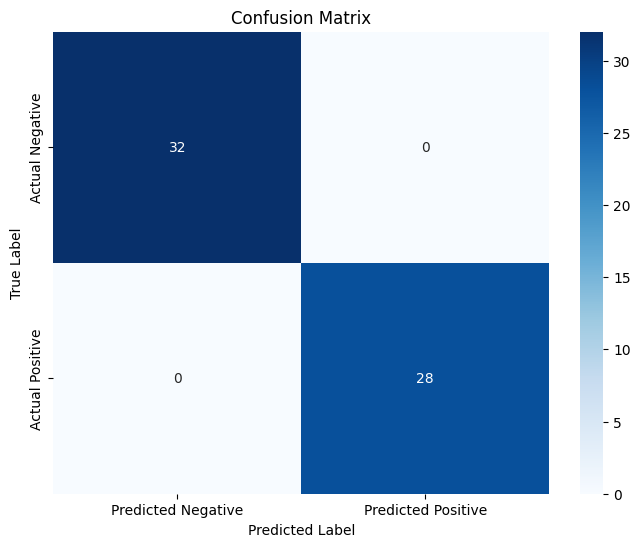

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

XGBoost Model

In [30]:
import xgboost as xgb

In [31]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [33]:
model.save_model('model.bin')

/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py:1118: UserWarning: [09:36:46] WARNING: /workspace/src/c_api/c_api.cc:1575: Saving model in the UBJSON format as default.  You can use a file extension: `json` or `ubj` to choose between formats.
  self.get_booster().save_model(fname)


In [36]:
loaded_model = xgb.XGBClassifier()
loaded_model.load_model('model.bin')

y_pred_xgb = loaded_model.predict(X_test)
print("XGBoost Predictions:", y_pred_xgb)

XGBoost Predictions: [1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0
 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1]


/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py:1127: UserWarning: [09:47:43] WARNING: /workspace/src/c_api/c_api.cc:1511: Unknown file format: `bin`. Using UBJSON (`ubj`) as a guess.
  self.get_booster().load_model(fname)


In [37]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

XGBoost Accuracy: 1.0


In [38]:
performance_xgb = classification_report(y_test, y_pred_xgb)
print("XGBoost Classification Report:\n", performance_xgb)

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        28

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



XGBoost Confusion Matrix:
 [[32  0]
 [ 0 28]]


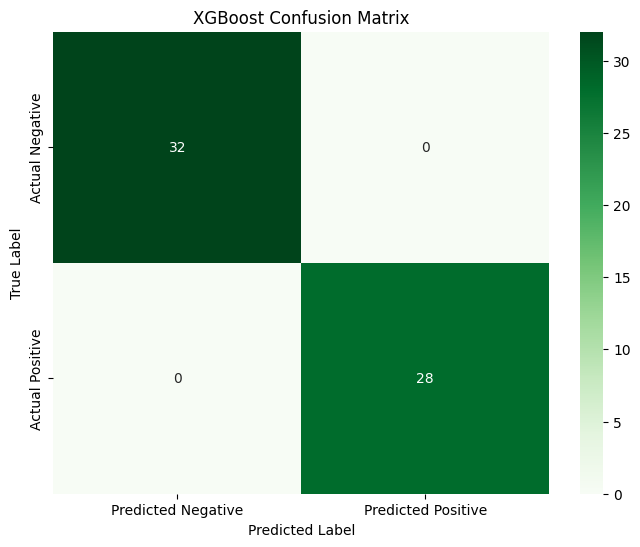

In [39]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("XGBoost Confusion Matrix:\n", cm_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='Greens', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Confusion Matrix')
plt.show()

### Random Forest Model Performance

In [40]:
print("Random Forest Accuracy:", accuracy)
print("Random Forest Classification Report:\n", performance)
print("Random Forest Confusion Matrix:\n", cm)

Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        28

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Random Forest Confusion Matrix:
 [[32  0]
 [ 0 28]]


### XGBoost Model Performance

In [41]:
print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Classification Report:\n", performance_xgb)
print("XGBoost Confusion Matrix:\n", cm_xgb)

XGBoost Accuracy: 1.0
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        28

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

XGBoost Confusion Matrix:
 [[32  0]
 [ 0 28]]
